In [1]:
from notebook_tools import *
%matplotlib inline

# pp-SRC analysis

In [2]:
variables = ['A'
             ,'OpeningAngle','cos(TMath::DegToRad()*OpeningAngle)'
             ,'Xb'   ,'Pmiss.P()'    ,'Pmiss.Pt()'   ,'theta_pq'     ,'p_over_q' , 'Pcm.Mag()' 
             ,'TMath::RadToDeg()*theta_rec_q' ,'TMath::RadToDeg()*theta_miss_q'
             ,'pEdep[0]', 'protons[0].P()', 'pEdep[1]', 'protons[1].P()'
             ,'TMath::RadToDeg()*protons[0].Theta()',  'TMath::RadToDeg()*protons[1].Theta()' 
             ,'alpha[0]','alpha[1]'
            ]

In [3]:
A=12
ana_12C_eep = TAnalysisEG2( path+"/AnaFiles" , "Ana_eep_in_ppSRCcut_DATA_%s"%dm.Target(A) , ROOT.TCut() )
anarr_12C_eep = tree2array( ana_12C_eep.GetTree() , branches=variables , selection=None )
ana_12C = TAnalysisEG2( path+"/AnaFiles" , "Ana_ppSRCCut_DATA_%s"%dm.Target(A) , ROOT.TCut() )
anarr_12C = tree2array( ana_12C.GetTree() , branches=variables , selection=None )

(-1, 181)

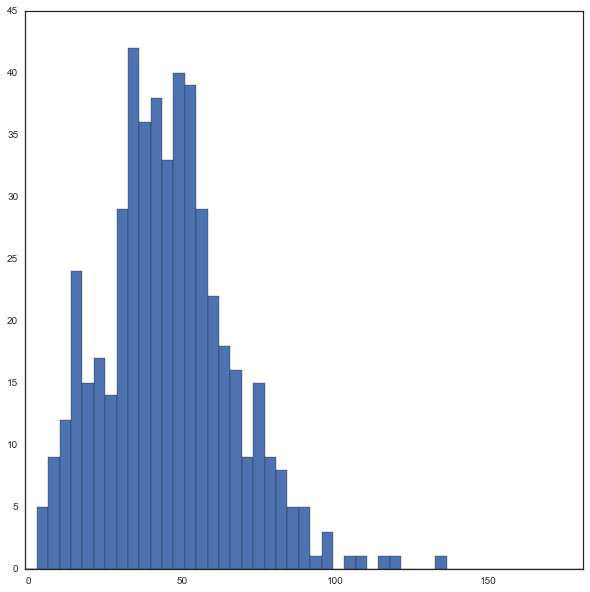

In [25]:
fig,ax=plt.subplots(figsize=(10,10))
plt.hist(anarr_12C['TMath::RadToDeg()*theta_rec_q'],bins=np.linspace(-1,181,50));
ax.set_xlim(-1,181)

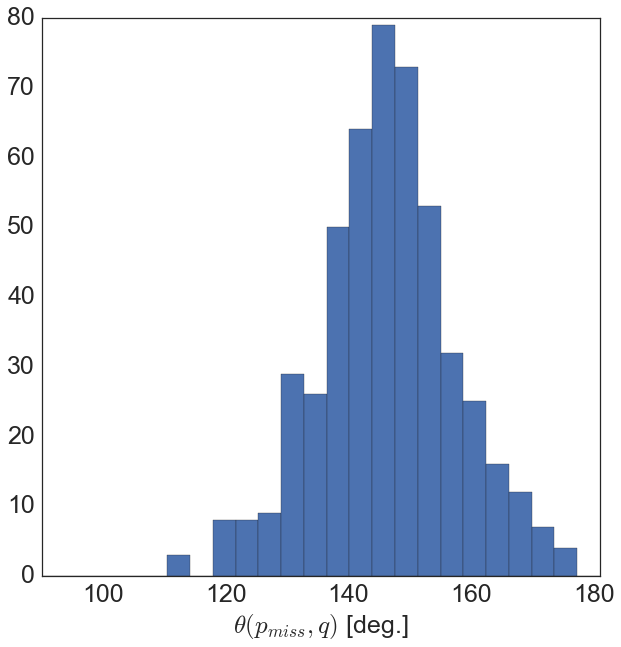

In [16]:
fig,ax=plt.subplots(figsize=(10,10))
plt.hist(anarr_12C['TMath::RadToDeg()*theta_miss_q'],bins=np.linspace(-1,181,50));
ax.set_xlim(90,181)
pt.set_axes(ax,'$\\theta(p_{miss},q)$ [deg.]','')

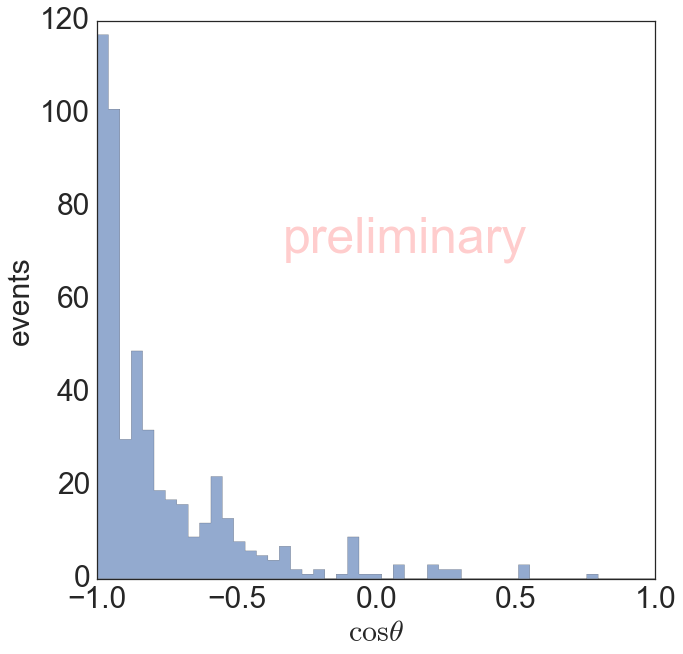

In [5]:
plot_hist1d( anarr_12C , 'cos(TMath::DegToRad()*OpeningAngle)', xmin=-1 , xmax=1 , nbins=50 , x_label='$\\cos\\theta$' , y_label='events' ,
            alpha=0.6 , histtype='stepfilled')

In [10]:
PmissBins = [[0.3,0.45]  , [0.45,0.55] , [0.55,0.65] , [0.65,0.75] , [0.75,1.0]]
anarr_12C_Pmbins , anarr_12C_eep_Pmbins = [] , []
for PmissBin in PmissBins:
    anarr_12C_eep_Pmbins.append(anarr_12C_eep[(PmissBin[0] < anarr_12C_eep['Pmiss.P()']) & (anarr_12C_eep['Pmiss.P()'] < PmissBin[1])])
    anarr_12C_Pmbins.append(anarr_12C[(PmissBin[0] < anarr_12C['Pmiss.P()']) & (anarr_12C['Pmiss.P()'] < PmissBin[1])])
    print "in %.2f<p(miss)<%.2f GeV/c, %d (e,e'p) / %d (e,e'pp)"%(PmissBin[0],PmissBin[1],len(anarr_12C_Pmbins[-1]),len(anarr_12C_eep_Pmbins[-1]))

in 0.30<p(miss)<0.45 GeV/c, 71 (e,e'p) / 4821 (e,e'pp)
in 0.45<p(miss)<0.55 GeV/c, 143 (e,e'p) / 2716 (e,e'pp)
in 0.55<p(miss)<0.65 GeV/c, 132 (e,e'p) / 1677 (e,e'pp)
in 0.65<p(miss)<0.75 GeV/c, 96 (e,e'p) / 830 (e,e'pp)
in 0.75<p(miss)<1.00 GeV/c, 56 (e,e'p) / 415 (e,e'pp)


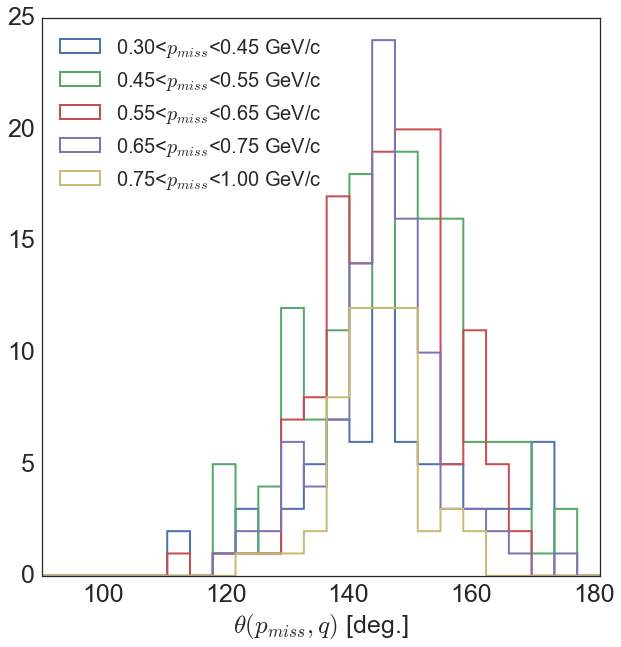

In [11]:
fig,ax=plt.subplots(figsize=(10,10))
ax.set_xlim(90,181)
for PmissBin,anarr_12C_Pmbin in zip(PmissBins,anarr_12C_Pmbins):
    plt.hist(anarr_12C_Pmbin['TMath::RadToDeg()*theta_miss_q'],
             bins=np.linspace(-1,181,50),label='%.2f<$p_{miss}$<%.2f GeV/c'%(PmissBin[0],PmissBin[1]),
             histtype='step', linewidth=2);
pt.set_axes(ax,'$\\theta(p_{miss},q)$ [deg.]','')
plt.legend(fontsize=20,loc='upper left')

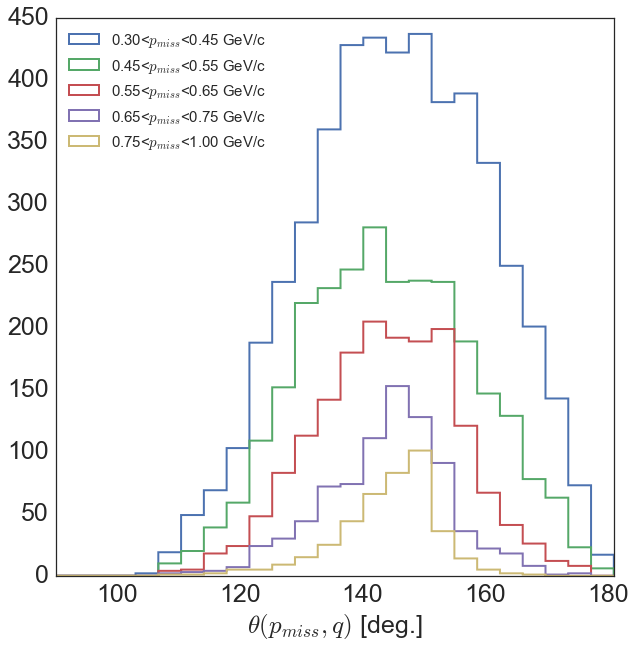

In [13]:
fig,ax=plt.subplots(figsize=(10,10))
ax.set_xlim(90,181)
for PmissBin,anarr_12C_eep_Pmbin in zip(PmissBins,anarr_12C_eep_Pmbins):
    plt.hist(anarr_12C_eep_Pmbin['TMath::RadToDeg()*theta_miss_q'],
             bins=np.linspace(-1,181,50),label='%.2f<$p_{miss}$<%.2f GeV/c'%(PmissBin[0],PmissBin[1]),
             histtype='step', linewidth=2);
pt.set_axes(ax,'$\\theta(p_{miss},q)$ [deg.]','')
plt.legend(fontsize=15,loc='upper left')